# Project - Sprocket Central Pty Ltd

## Task 2 - Analyse which of the New Customers should be targeted to drive the most value for the organisation

## a) Analysing the New Customers
Sprocket Central Pty Ltd has given us a new list of 1000 potential customers with their demographics and attributes. However, these customers do not have prior transaction history with the organisation. 

The marketing team at Sprocket Central Pty Ltd is sure that, if correctly analysed, the data would reveal useful customer insights which could help optimise resource allocation for targeted marketing. Hence, improve performance by focusing on high value customers.

For context, Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labeled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import numpy as np

In [2]:
df_new_customers = pd.read_excel('Files/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=2, header=1, usecols='A:W')

In [3]:
df_new_customers.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [4]:
# % of columns without values
df_new_customers.isna().sum() / len(df_new_customers) * 100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Unnamed: 16                             0.0
Unnamed: 17                             0.0
Unnamed: 18                             0.0
Unnamed: 19                             0.0
Unnamed: 20                             0.0
Rank                                    0.0
Value                           

In [5]:
# let´s check the age of customers
now = pd.Timestamp('now')
df_new_customers['age'] = (now - df_new_customers['DOB']).astype('<m8[Y]') 

In [6]:
# creating a group of age
df_new_customers['group_age'] = np.floor(df_new_customers['age'] / 10) *10

In [7]:
# Let´s drop the transactions with no brand(all brand with no values will be ignored)
df_new_customers.drop(['Unnamed: 16', 'Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis=1, inplace=True)

<AxesSubplot:>

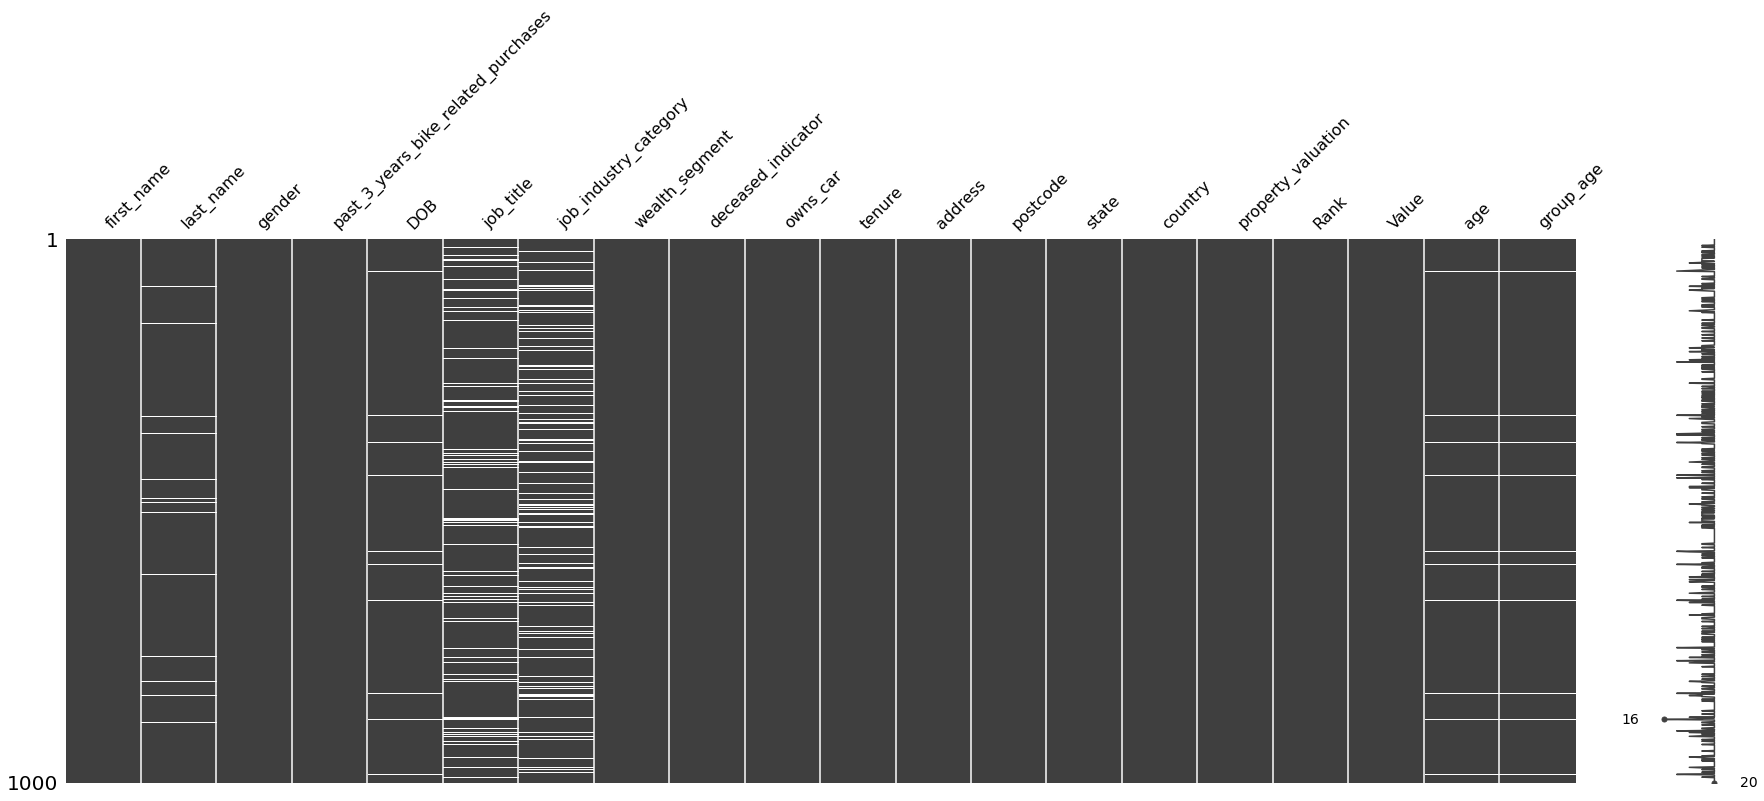

In [8]:
# visualizing if it has null values
missingno.matrix(df_new_customers, figsize=(30,10))

In [9]:
df_new_customers.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,group_age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,63.0,60.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,51.0,50.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,46.0,40.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,42.0,40.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,55.0,50.0


In [10]:
df_new_customers.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'age', 'group_age'],
      dtype='object')

#### Visualisation of some basic information about the New Customers per state

In [11]:
# get the states
states = df_new_customers['state'].unique()
df_st = df_new_customers.groupby('state',as_index=False).count()
df_st[['state','past_3_years_bike_related_purchases']].to_excel('Files/table1.xlsx')

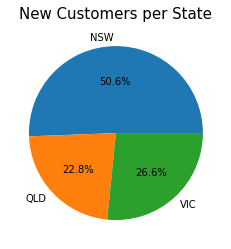

In [12]:
plt.figsize=(15,5)
plt.title('New Customers per State',fontsize=15)
plt.pie(df_st['past_3_years_bike_related_purchases'],labels=df_st['state'],autopct="%.1f%%")
plt.savefig('Files/Per State.png')
plt.show()

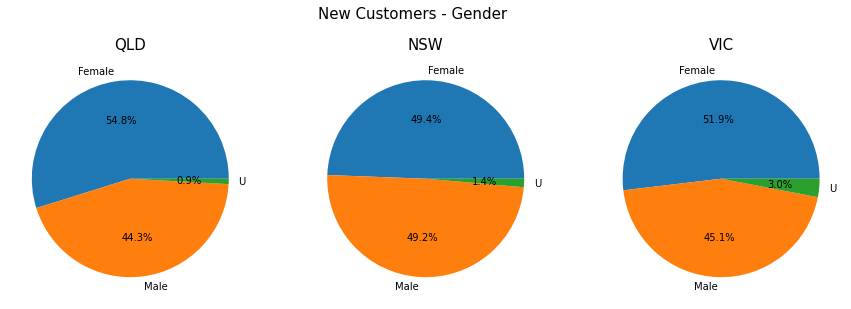

In [13]:
df_st_gender = df_new_customers.groupby(['state','gender'],as_index=False).count()
df_st_gender.to_excel('Files/table2.xlsx')

fig, axs = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('New Customers - Gender',fontsize=15)
for x,st in enumerate(states):
    df_gender = df_st_gender[df_st_gender['state'] == st]
    axs[x].pie(df_gender['past_3_years_bike_related_purchases'], labels=df_gender['gender'],autopct="%.1f%%")
    axs[x].set_title(st,fontsize=15)
plt.savefig('Files/Per Gender.png')
plt.show()

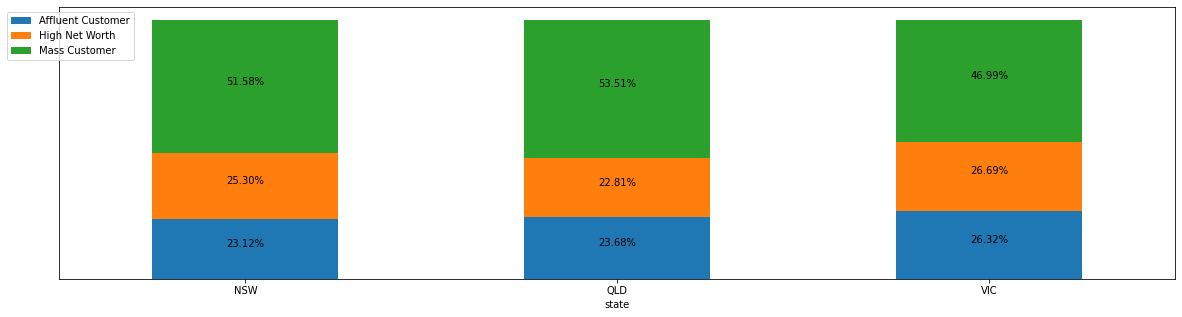

In [14]:
ax= pd.crosstab(df_new_customers['state'], df_new_customers['wealth_segment']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(20,5),stacked=True, rot=0)

plt.legend(loc='upper center', bbox_to_anchor=(0.01, 1), fontsize=10)

# getting current axes
a = plt.gca()
# set visibility of y-axis as False
yax = a.axes.get_yaxis()
yax = yax.set_visible(False)

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.2f}%".format(height),
              ha='center', 
              va='bottom')
plt.savefig('Files/Per WealthSegment.png')
plt.show()

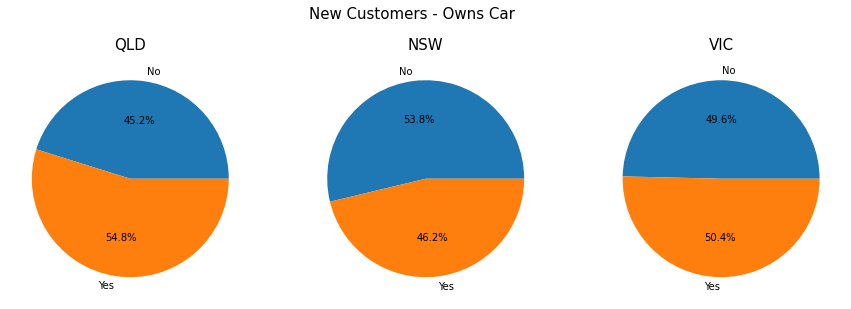

In [15]:
df_st_car = df_new_customers.groupby(['state','owns_car'],as_index=False).count()
df_st_car.to_excel('Files/table3.xlsx')

fig, axs = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('New Customers - Owns Car',fontsize=15)
for x,st in enumerate(states):
    df_car = df_st_car[df_st_car['state'] == st]
    axs[x].pie(df_car['past_3_years_bike_related_purchases'], labels=df_car['owns_car'],autopct="%.1f%%")
    axs[x].set_title(st,fontsize=15)
plt.savefig('Files/Per OwnsCar.png')
plt.show()

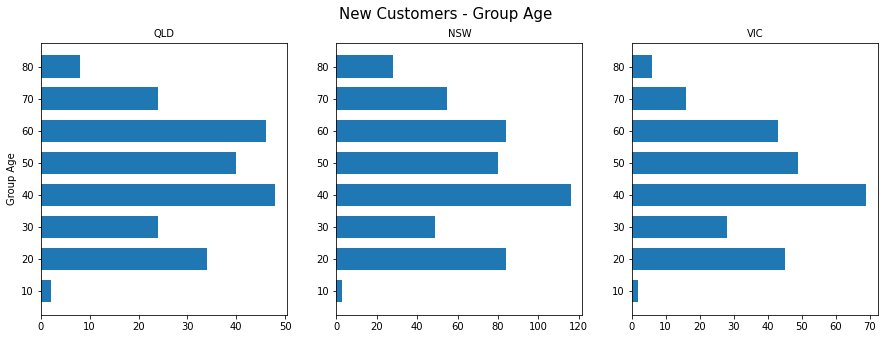

In [16]:
df_st_age = df_new_customers.groupby(['state','group_age'],as_index=False).count()
df_st_age.to_excel('Files/table4.xlsx')

fig, axs = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('New Customers - Group Age',fontsize=15)
axs[0].set_ylabel('Group Age')
for x,st in enumerate(states):
    df_age = df_st_age[df_st_age['state'] == st]
    axs[x].barh(df_age['group_age'],df_age['past_3_years_bike_related_purchases'],height=7)
    axs[x].set_title(st,fontsize=10)
plt.savefig('Files/Per Age.png')
plt.show()

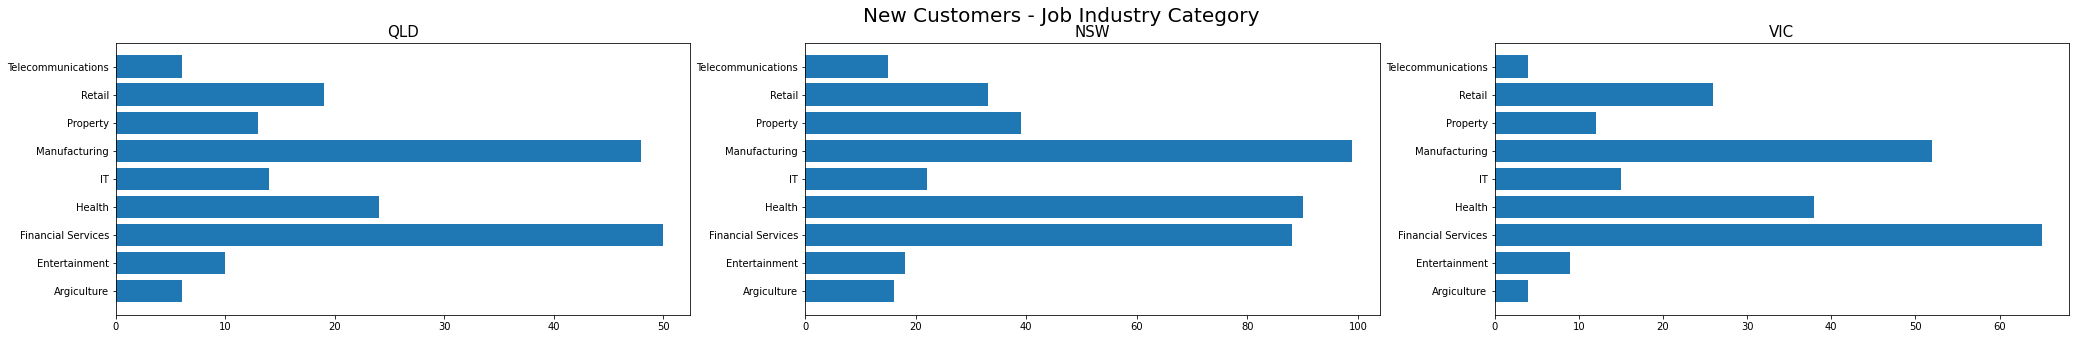

In [17]:
df_st_ind = df_new_customers.groupby(['state','job_industry_category'],as_index=False).count()
df_st_ind.to_excel('Files/table5.xlsx')

fig, axs = plt.subplots(1,3,figsize=(35,5))
fig.suptitle('New Customers - Job Industry Category',fontsize=20)

for x,st in enumerate(states):
    df_ind = df_st_ind[df_st_ind['state'] == st]
    axs[x].barh(df_ind['job_industry_category'],df_ind['past_3_years_bike_related_purchases'])
    axs[x].set_title(st,fontsize=15)

plt.savefig('Per Category.png')
plt.show()

In [18]:
pd.set_option('display.max_rows', None)
df_segment = df_new_customers.groupby(['state','gender','group_age']).agg(['count', 'mean','sum'])
df_segment[['past_3_years_bike_related_purchases']].to_excel("Files/table6.xlsx")

## Task 2 - Last step of this task is to create a power point presentation
### In building this recommendation, we need to start with a PowerPoint presentation which outlines the approach which we will be taking, exploring the following 3 phases: Data Exploration; Model Development and Interpretation.

In [24]:
from IPython.display import IFrame
IFrame("Files/Task2-answer.pdf", width=900, height=500)

## b) Analizing the first dataset sent from Sprocket with Customers Information to compare to the New Customers

In [19]:
df_customer = pd.read_excel('Files/KPMG_Sprocket_cleaned.xlsx', sheet_name=0)
df_customer_trans = pd.read_excel('Files/KPMG_Sprocket_cleaned.xlsx', sheet_name=1)

#### Visualisation of some basic information about the Customers dataset

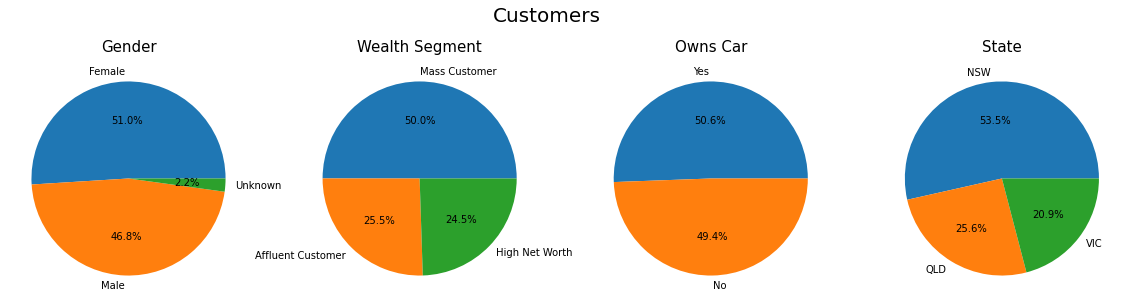

In [20]:
fig, axs = plt.subplots(1,4,figsize=(20,5))
fig.suptitle('Customers',fontsize=20)
axs[0].pie(df_customer['gender'].value_counts(),labels=df_customer['gender'].unique(),autopct="%.1f%%")
axs[0].set_title('Gender',fontsize=15)
axs[1].pie(df_customer['wealth_segment'].value_counts(),labels=df_customer['wealth_segment'].unique(),autopct="%.1f%%")
axs[1].set_title('Wealth Segment',fontsize=15)
axs[2].pie(df_customer['owns_car'].value_counts(),labels=df_customer['owns_car'].unique(),autopct="%.1f%%")
axs[2].set_title('Owns Car',fontsize=15)
axs[3].pie(df_customer['state'].value_counts(),labels=df_customer['state'].unique(),autopct="%.1f%%")
axs[3].set_title('State',fontsize=15)
plt.show()

#### Visualisation of some basic information about the Transactions dataset

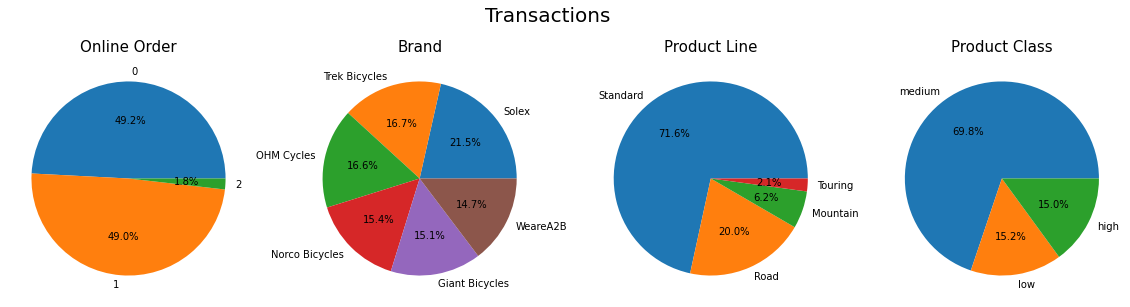

In [21]:
fig, axs = plt.subplots(1,4,figsize=(20,5))
fig.suptitle('Transactions',fontsize=20)
axs[0].pie(df_customer_trans['online_order'].value_counts(),labels=df_customer_trans['online_order'].unique(),autopct="%.1f%%")
axs[0].set_title('Online Order',fontsize=15)
axs[1].pie(df_customer_trans['brand'].value_counts(),labels=df_customer_trans['brand'].unique(),autopct="%.1f%%")
axs[1].set_title('Brand',fontsize=15)
axs[2].pie(df_customer_trans['product_line'].value_counts(),labels=df_customer_trans['product_line'].unique(),autopct="%.1f%%")
axs[2].set_title('Product Line',fontsize=15)
axs[3].pie(df_customer_trans['product_class'].value_counts(),labels=df_customer_trans['product_class'].unique(),autopct="%.1f%%")
axs[3].set_title('Product Class',fontsize=15)
plt.show()

### If we compare the New Customers with the 3 last data set received, they have almost that same characteristics regardless to gender, wealth segment, owns car, state...
### So we can get the information about customers transactions to study the most products and brands that they are looking for.